#**Task 1**
#### Week 1 (Learning Period Synapse)
###### pandas, numpy, matplotlib

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Import pandas, numpy and matplotlib

In [ ]:
#write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. load the data 

In [ ]:
train_path = "/content/gdrive/My Drive/synapse_w1/train.csv"
test_path = "/content/gdrive/My Drive/synapse_w1/test.csv"

#write code to load train.csv and test.csv in dataframes
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
#write code to show first five data entries of both dataframes

# train_df = train_df.set_index('PassengerId')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Exploratory Data Analysis

### 3.a. overview of the dataset

 - write code to list the columns in your dataframe (each column on new line as visibility is important)

In [ ]:
#write code here 
print('The columns present in the dataset are: \n{}'.format('\n'.join(train_df.columns)))

The columns present in the dataset are: 
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


 - write a function that returns the number of rows and columns in the dataset 

In [ ]:
#write code here (print values as well)
#shape functio of the pandas dataframe gives a tuple which contains the number of rows and columns

print(train_df.shape)
print('The number of rows and columns are {} and {} respectivey'.format(train_df.shape[0], train_df.shape[1]))

(891, 12)
The number of rows and columns are 891 and 12 respectivey


 - use the info() method of pandas dataframe to print the info related to the dataframe

In [ ]:
# write code here
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


 - use the describe() method of pandas dataframe to print the statistical description of the dataset

In [ ]:
#write code here
print(train_df.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


 - Find all columns that have unique values. (example : the Gender column has 2 unique values Male and Female) <br>

 - if the columns have finite unique values, then add them in a dictionary of lists and print it <br>

In [ ]:
#write code here
import pprint

unique_dict = {}
for column in train_df.columns :
  count = 0
  for unique_value in train_df[column].unique() :
    count += 1  
  if count < 10 :
    unique_dict.update({column : list(train_df[column].unique())})

pprint.pprint(unique_dict)

{'Embarked': ['S', 'C', 'Q', nan],
 'Parch': [0, 1, 2, 5, 3, 4, 6],
 'Pclass': [3, 1, 2],
 'Sex': ['male', 'female'],
 'SibSp': [1, 0, 3, 4, 2, 5, 8],
 'Survived': [0, 1]}


### 3.b. Visualizing hidden Details

##### Aim is to find relationship between Title and Survival rate
- print the <b>name</b> column of the data<br>
- notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
- extract the title using regular expression (help given below in the code)
- store the title in a new column in the dataframe. Name the column : <b>Title</b>

In [ ]:
#write code here (for regex help refer next code cell)
import re

print(train_df['Name'])

title = []
for train_df_name in train_df['Name'] :
  title_search = re.search('(\w+)\.', train_df_name)
  title.append(title_search.group(1))

train_df['Title'] = title

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [ ]:
#show the new dataframe with "Title" column here
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


- write code to get unique values from the title column
- use the unique titles to find the number of people who survived (1) and number of people who did not (0) for each title. <b>num_survived/total</b> will give the survival rate for that title
- make a new dataframe called <b>SR_df</b> and add the survival rates corresponding to titles in it<br><br>
you may write a function for the above.<br><br>

In [ ]:
#write code here

def survival_state(check_value, column_name) :
  count, survived, not_survived = 0, 0, 0
  for t in train_df[column_name] :
    if t == check_value :
      if train_df['Survived'][count] == 1 :
        survived += 1  
      else :
        not_survived += 1
    count += 1   
  return survived, not_survived 

title_unique = train_df['Title'].unique()
sr = []
for x in title_unique :
  y, n = survival_state(x, 'Title')
  sr.append(y / (y + n))

sr_data = {}

sr_data.update({'Title' : list(title_unique)})
sr_data.update({'Survival Rate' : sr})

SR_df = pd.DataFrame(sr_data)

In [ ]:
#show the new dataframe SR_df here
SR_df

,Title,Survival Rate
0,Mr,0.156673
1,Mrs,0.792000
2,Miss,0.697802
3,Master,0.575000
4,Don,0.000000
5,Rev,0.000000
6,Dr,0.428571
7,Mme,1.000000
8,Ms,1.000000
9,Major,0.500000


- use SR_df to plot a bar graph for survival rate vs Title

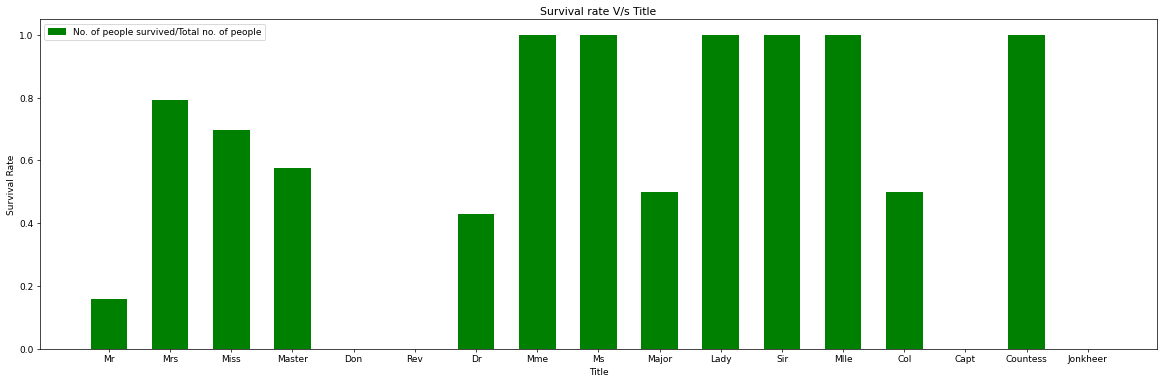

In [ ]:
#write code here

fig, ax = plt.subplots(figsize = (18, 6), dpi = 65)
ax.bar(SR_df['Title'], SR_df['Survival Rate'], color = 'green', width = 0.6, label = 'No. of people survived/Total no. of people')
ax.set_xlabel('Title')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival rate V/s Title')
ax.legend()
plt.tight_layout()

## 4. Data Visualization

- Make a pie chart to show the number of people who survived and number of people who did not
- Make a pie chart to show the number of <b>Males</b> who survived and number of <b>Males</b> who did not
- Make a pie chart to show the number of <b>Females</b> who survived and number of <b>Females</b> who did not
<br><br>

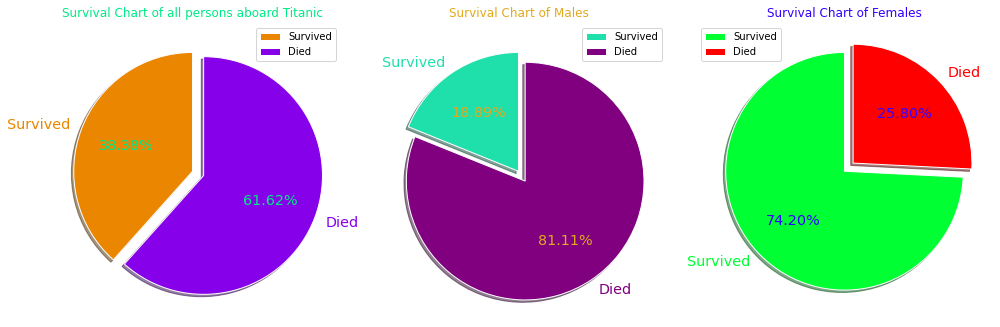

In [ ]:
#write code here

# Getting the number of people who survived and who did not
counter = 0
for i in train_df['Survived'] :
  if i == 1 :
    counter +=1
p_survive_data = counter, len(train_df['Survived']) - counter

# Getting the number of Males who survived and who did not
male_survive_data = survival_state('male', 'Sex')

# Getting the number of Females who survived and who did not
female_survive_data = survival_state('female', 'Sex')

label_pie = ['Survived' ,'Died']

# Plotting the Pie charts
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
patches, texts, pcts = ax[0].pie(p_survive_data, 
                                 startangle = 90, labels = label_pie,
                                 colors = ['#ea8600', '#8600ea'],
                                 autopct = '%.2f%%', shadow = True, explode = (0, 0.1),
                                 wedgeprops = {'linewidth' : 1.0, 'edgecolor' : 'white'},
                                 textprops = {'size' : 'x-large'})

for i, patch in enumerate(patches) :
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = '#00ea86')  
plt.setp(texts, fontweight = 500)

ax[0].set_title('Survival Chart of all persons aboard Titanic', color = '#00ea86')
ax[0].legend()
plt.tight_layout()

patches, texts, pcts = ax[1].pie(male_survive_data, 
                                 startangle = 90, labels = label_pie,
                                 autopct = '%.2f%%', shadow = True, explode = (0, 0.1),
                                 colors = ['#1fe0aa', '#800080'],
                                 wedgeprops = {'linewidth' : 1.0, 'edgecolor' : 'white'},
                                 textprops = {'size' : 'x-large'})

for i, patch in enumerate(patches) :
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = '#e0aa1f')  
plt.setp(texts, fontweight = 500)

ax[1].set_title('Survival Chart of Males', color = '#e0aa1f')
ax[1].legend()
plt.tight_layout()

patches, texts, pcts = ax[2].pie(female_survive_data, 
                                 startangle = 90, labels = label_pie,
                                 autopct = '%.2f%%', shadow = True, explode = (0, 0.1),
                                 colors = ['#00ff33', '#ff0000'], 
                                 wedgeprops = {'linewidth' : 1.0, 'edgecolor' : 'white'},
                                 textprops = {'size' : 'x-large'})

for i, patch in enumerate(patches) :
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = '#3300ff')  
plt.setp(texts, fontweight = 500)

ax[2].set_title('Survival Chart of Females', color = '#3300ff')
ax[2].legend()
plt.tight_layout()

- Find if money affected survival rate (fare and Pclass) 
 - Make a bar graph showing Pclass vs survival rate
 - Make a KDE plot (use the sns library) and plot Fare based on the Survival (google away for this one)

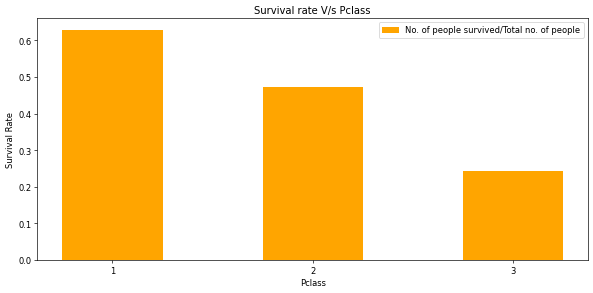

In [ ]:
#write code here

pclass_sr = []
for p_class in train_df['Pclass'].unique() :
  y, n = survival_state(p_class, 'Pclass')
  pclass_sr.append(y / (y + n))

pclass_sr_data = {}
pclass_sr_data.update({'Pclass' : list(train_df['Pclass'].unique())})
pclass_sr_data.update({'Survival Rate' : pclass_sr})

Pclass_SR_df = pd.DataFrame(pclass_sr_data)

fig, ax = plt.subplots(figsize = (10, 5), dpi = 60)

ax.bar(Pclass_SR_df['Pclass'], Pclass_SR_df['Survival Rate'], color = 'orange', 
          width = 0.5, label = 'No. of people survived/Total no. of people')
ax.set_xlabel('Pclass')
ax.set_xticks([1, 2, 3])
ax.set_ylabel('Survival Rate')
ax.set_title('Survival rate V/s Pclass')
ax.legend()
plt.tight_layout()

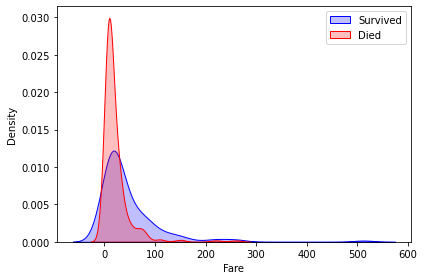

In [ ]:
import seaborn as sns

sns.kdeplot(train_df.loc[(train_df['Survived'] == 1), 'Fare'], color = 'blue', 
            shade = True, Label = 'Survived')
sns.kdeplot(train_df.loc[(train_df['Survived'] == 0), 'Fare'], color = 'r', 
            shade = True, Label = 'Died')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

## 5. Preprocessing

### 5.a. Removing unnecessary columns

 - The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
 - We will also remove the Name column as we have done <b>feature extraction</b> and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [ ]:
#write code to remove unnecessary columns from the dataframe here

train_df.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Rev
887,1,1,female,19.0,0,0,30.0000,B42,S,Miss
888,0,3,female,NaN,1,2,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr


### 5.b. Nan analysis

 - write code to find the percentage of Nans in each column and visualize it in a tabular format

In [ ]:
#write code here

from tabulate import tabulate

t = []
for item in train_df :
  t.append([item, round(train_df[item].isna().sum() * 100 / 891, 2)])

print(tabulate(t, headers = ['Column Name', 'Percentage of Null Values'], tablefmt = 'fancy_grid'))
print()

# Or 

print('{:<15} {:<10}'.format('Column Name', 'Percentage of Null Values'))
for d in t :
  c_name, n_value = d
  print('{:<15} {:<10}'.format(c_name, n_value))
print()  

# Or

t = {}
c = 0
for item in train_df :
  l = []
  l.append(round((train_df[item].isna().sum() * 100 / 891), 2))
  t.update({item : l})
  c += 1

null_df = pd.DataFrame(t)
null_df.transpose()

╒═══════════════╤═════════════════════════════╕
│ Column Name   │   Percentage of Null Values │
╞═══════════════╪═════════════════════════════╡
│ Survived      │                        0    │
├───────────────┼─────────────────────────────┤
│ Pclass        │                        0    │
├───────────────┼─────────────────────────────┤
│ Sex           │                        0    │
├───────────────┼─────────────────────────────┤
│ Age           │                       19.87 │
├───────────────┼─────────────────────────────┤
│ SibSp         │                        0    │
├───────────────┼─────────────────────────────┤
│ Parch         │                        0    │
├───────────────┼─────────────────────────────┤
│ Fare          │                        0    │
├───────────────┼─────────────────────────────┤
│ Cabin         │                       77.1  │
├───────────────┼─────────────────────────────┤
│ Embarked      │                        0.22 │
├───────────────┼───────────────────────

,0
Survived,0.00
Pclass,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Fare,0.00
Cabin,77.10
Embarked,0.22
Title,0.00


 - remove any column having more than 50% Nans as they would be of no use

In [ ]:
#write code here

for item in train_df :
  if (train_df[item].isnull().sum() * 100 / 891) > 50 :
    train_df.drop([item], axis = 1, inplace = True)

train_df    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


 - Fill Nans in the Embark column with the statistical mode
 - Fill Nans in the Age column with it's statistical mean

In [ ]:
#write code here

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df.tail(65)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
826,0,3,male,NaN,0,0,56.4958,S,Mr
827,1,2,male,1.0,0,2,37.0042,C,Master
828,1,3,male,NaN,0,0,7.7500,Q,Mr
829,1,1,female,62.0,0,0,80.0000,S,Mrs
830,1,3,female,15.0,1,0,14.4542,C,Mrs
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [ ]:
print(train_df['Age'].tail(15))
train_df['Age'] = train_df['Age'].fillna(int(train_df['Age'].mean()))
train_df.tail(15)

876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
876,0,3,male,20.0,0,0,9.8458,S,Mr
877,0,3,male,19.0,0,0,7.8958,S,Mr
878,0,3,male,29.0,0,0,7.8958,S,Mr
879,1,1,female,56.0,0,1,83.1583,C,Mrs
880,1,2,female,25.0,0,1,26.0000,S,Mrs
881,0,3,male,33.0,0,0,7.8958,S,Mr
882,0,3,female,22.0,0,0,10.5167,S,Miss
883,0,2,male,28.0,0,0,10.5000,S,Mr
884,0,3,male,25.0,0,0,7.0500,S,Mr
885,0,3,female,39.0,0,5,29.1250,Q,Mrs


 - show the new Nan percentage vs column name table after filling and removing to make sure there are no Nans

In [ ]:
#write code here

t = []
for item in train_df :
  t.append([item, round(train_df[item].isna().sum() * 100 / 891, 2)])

print(tabulate(t, headers = ['Column Name', 'Percentage of Null Values'], tablefmt = 'fancy_grid'))
print()

╒═══════════════╤═════════════════════════════╕
│ Column Name   │   Percentage of Null Values │
╞═══════════════╪═════════════════════════════╡
│ Survived      │                           0 │
├───────────────┼─────────────────────────────┤
│ Pclass        │                           0 │
├───────────────┼─────────────────────────────┤
│ Sex           │                           0 │
├───────────────┼─────────────────────────────┤
│ Age           │                           0 │
├───────────────┼─────────────────────────────┤
│ SibSp         │                           0 │
├───────────────┼─────────────────────────────┤
│ Parch         │                           0 │
├───────────────┼─────────────────────────────┤
│ Fare          │                           0 │
├───────────────┼─────────────────────────────┤
│ Embarked      │                           0 │
├───────────────┼─────────────────────────────┤
│ Title         │                           0 │
╘═══════════════╧═══════════════════════

### 5.c. Adding features to the dataset

 - Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
 - Using that create a new column called <B>Family_members</b>
 - Fill it with the sum of SibSP and Parch

In [ ]:
#write code here

family_members = []
for i, j in zip(train_df['SibSp'], train_df['Parch']) :
  family_members.append(i+j)

train_df['Family_members'] = family_members
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev,0
887,1,1,female,19.0,0,0,30.0000,S,Miss,0
888,0,3,female,29.0,1,2,23.4500,S,Miss,3
889,1,1,male,26.0,0,0,30.0000,C,Mr,0


 - Now you may remove the two columns SibSP and Parch<br>
 It is important to remove them because they introduce multicollinearity in our dataset now as the new column Family_members is directly dependent on them.<br>
 Multicollinearity is deadly to linear models that we will look into later

In [ ]:
#write code here

train_df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Rev,0
887,1,1,female,19.0,30.0000,S,Miss,0
888,0,3,female,29.0,23.4500,S,Miss,3
889,1,1,male,26.0,30.0000,C,Mr,0


### 5.d. Scaling and Normalization

 - Columns to apply scaling on
  - Age
  - Fare
  - Family_members

- Although Pclass column is numeric, it contains classification data (only 1, 2 and 3). Therefore only continuous data like age, fare, etc needs to be normalized

In [ ]:
#write code here to normalize data

age_normalize, fare_standardize, faimly_members_standardize = [], [], []

# Defining a function for normalization
def normalize_fun(col) :
  data_max, data_min = train_df[col].max(), train_df[col].min()
  data_normalize = []
  for item in train_df[col] :
    data_normalize.append((item - data_min) / (data_max - data_min))
  return data_normalize

def standardize_fun(col) :
  data_mean, data_std = train_df[col].mean(), train_df[col].std()
  data_standardize = []
  for item in train_df[col] :
    data_standardize.append((item - data_mean) / data_std)
  return data_standardize

age_normalize = normalize_fun('Age')  
fare_standardize = standardize_fun('Fare')
faimly_members_standardize = standardize_fun('Family_members')

train_df['Age'] = age_normalize
train_df['Fare'] = fare_standardize
train_df['Family_members'] = faimly_members_standardize
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,-0.502163,S,Mr,0.059127
1,1,1,female,0.472229,0.786404,C,Mrs,0.059127
2,1,3,female,0.321438,-0.488580,S,Miss,-0.560660
3,1,1,female,0.434531,0.420494,S,Mrs,0.059127
4,0,3,male,0.434531,-0.486064,S,Mr,-0.560660
...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,-0.386454,S,Rev,-0.560660
887,1,1,female,0.233476,-0.044356,S,Miss,-0.560660
888,0,3,female,0.359135,-0.176164,S,Miss,1.298700
889,1,1,male,0.321438,-0.044356,C,Mr,-0.560660


### 5.e. One hot encoding

Machine Learning models do not understand strings <br>
They understand numbers<br>
That is one of the reasons why we one hot encode few columns<br>

- columns to apply one_hot encoding on
 - Pclass
 - Sex
 - Title
 - Embarked

In [ ]:
#write code here

columns_to_dummy = ['Pclass', 'Sex', 'Title', 'Embarked']

for item in train_df :
  if item in columns_to_dummy :
    temp_df = pd.get_dummies(train_df[item], prefix = item)
    
    train_df = pd.merge(
        left = train_df,
        right = temp_df,
        left_index = True,
        right_index = True
    )

    train_df = train_df.drop(columns = item)

In [ ]:
#show the final dataframe here
train_df

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,0.271174,-0.502163,0.059127,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0.472229,0.786404,0.059127,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0.321438,-0.488580,-0.560660,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0.434531,0.420494,0.059127,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0.434531,-0.486064,-0.560660,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,-0.386454,-0.560660,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
887,1,0.233476,-0.044356,-0.560660,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
888,0,0.359135,-0.176164,1.298700,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
889,1,0.321438,-0.044356,-0.560660,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


End of Preprocessing